# Analysis of stock prices in different time periods


In [2]:
from analysis import Column,get_best_month_day

import numpy as np
import pandas as pd
from seaborn import lineplot, barplot, scatterplot, boxplot
from matplotlib import pyplot

pd.options.mode.chained_assignment = None

FILENAME = "sp500.csv"
LIMIT = 5


def plot(**kwargs):
    funcs = [boxplot, barplot, scatterplot, lineplot]
    # NOTE: after lineplot X will be float

    fig, axs = pyplot.subplots(nrows=len(funcs), figsize=(15,20))

    for i, func in enumerate(funcs):
        ax = axs[i]

        data = kwargs['data']
        x = kwargs['x']

        if func == lineplot:
            data[x] = data[x].astype(float)
        elif func == barplot:
            Y = data[kwargs['y']]
            ax.set_ylim(Y.quantile(0.20), Y.quantile(0.80))
            
        func(**kwargs, ax=ax)

    fig.tight_layout()

## Daily stock price fluctuations within a month

In [3]:
df = get_best_month_day(FILENAME, limit=LIMIT)

df

[*********************100%***********************]  5 of 5 completed
2021-05-10 22:54:58.550 | DEBUG    | analysis:_get_month_day_diffs:192 - Not enough data for AOS in 2010.12
2021-05-10 22:54:58.560 | DEBUG    | analysis:_get_month_day_diffs:192 - Not enough data for MMM in 2010.12
2021-05-10 22:54:58.578 | DEBUG    | analysis:_get_month_day_diffs:192 - Not enough data for ABMD in 2010.12
2021-05-10 22:54:58.573 | DEBUG    | analysis:_get_month_day_diffs:192 - Not enough data for ABT in 2010.12


year  month  day     percent
232   2011     12    1       100.0
233   2011     12    2  101.052627
234   2011     12    5   102.15538
235   2011     12    6  101.854631
236   2011     12    7  102.355886
...    ...    ...  ...         ...
1989  2018     11   26   99.478951
1990  2018     11   27   99.449997
1991  2018     11   28  101.461865
1992  2018     11   29   104.83428
1993  2018     11   30  107.005361

[9558 rows x 4 columns]

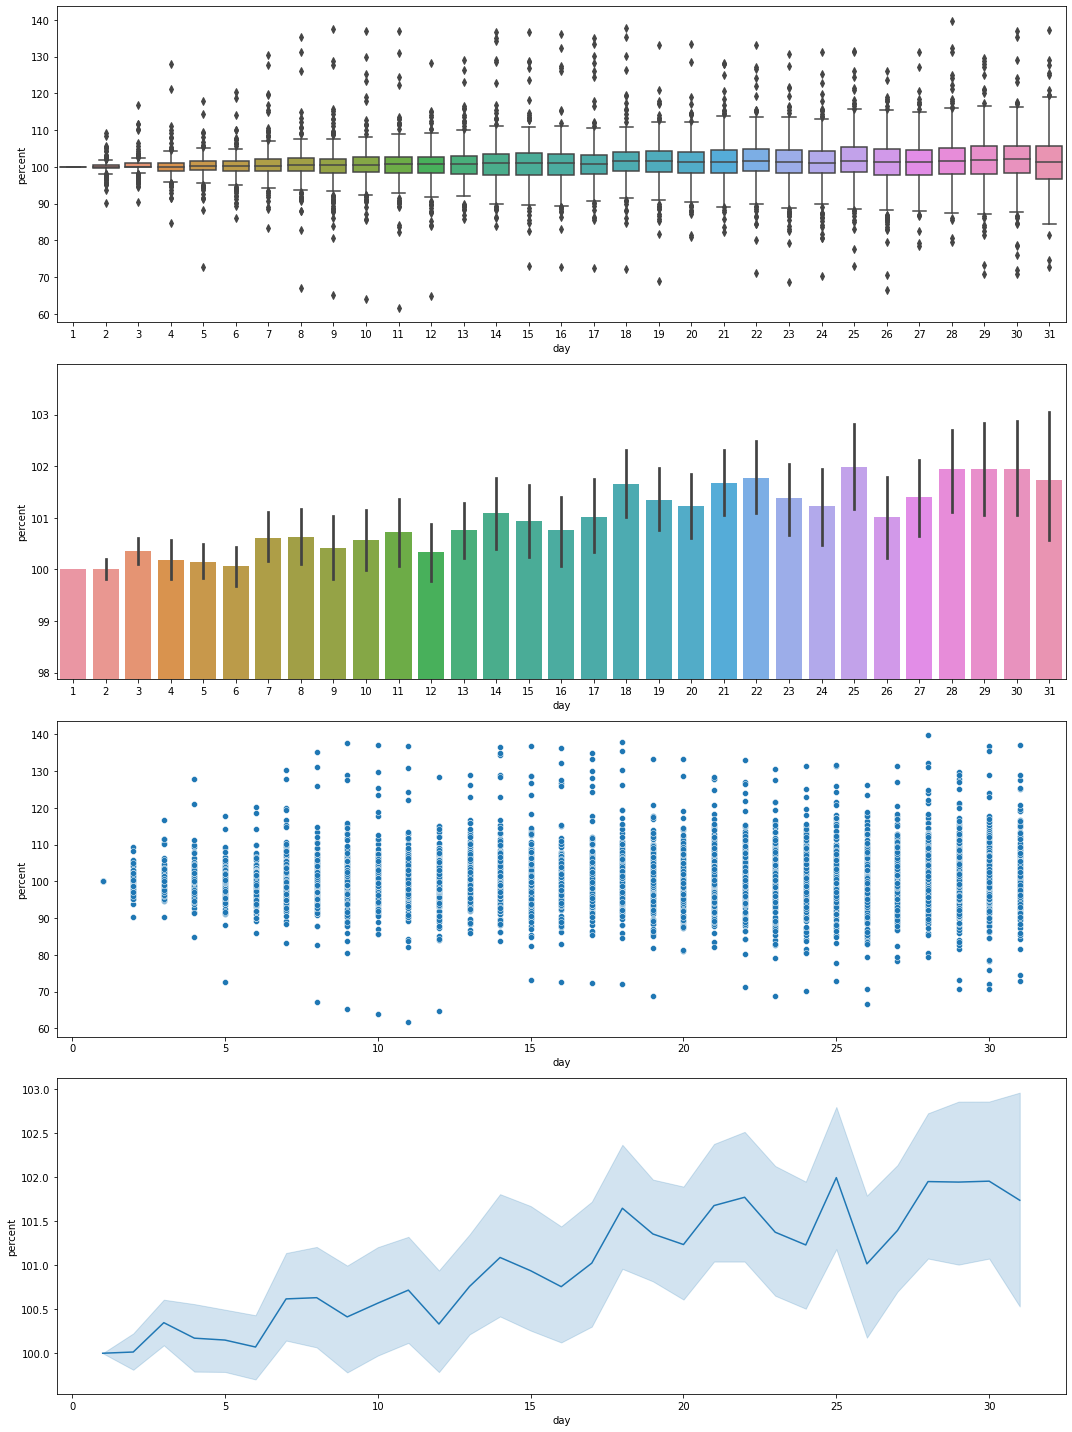

In [4]:
plot(x=Column.DAY, y=Column.PERCENT, data=df)

## Monthly stock price fluctuations within a year

In [5]:
from analysis import get_best_month

df = get_best_month(FILENAME, limit=LIMIT)
df

[*********************100%***********************]  5 of 5 completed
2021-05-10 22:55:07.798 | DEBUG    | analysis:_get_monthly_diffs:148 - Not enough data for ABMD in 2010
2021-05-10 22:55:07.830 | DEBUG    | analysis:_get_monthly_diffs:148 - Not enough data for AOS in 2010
2021-05-10 22:55:07.856 | DEBUG    | analysis:_get_monthly_diffs:148 - Not enough data for MMM in 2010
2021-05-10 22:55:07.824 | DEBUG    | analysis:_get_monthly_diffs:148 - Not enough data for ABT in 2010


year  month     percent
0   2013      1       100.0
1   2013      2   104.36257
2   2013      3   107.61859
3   2013      4  120.521255
4   2013      5  127.502798
..   ...    ...         ...
92  2018      8   90.163622
93  2018      9   89.817176
94  2018     10   74.249715
95  2018     11   71.596887
96  2018     12    66.93009

[456 rows x 3 columns]

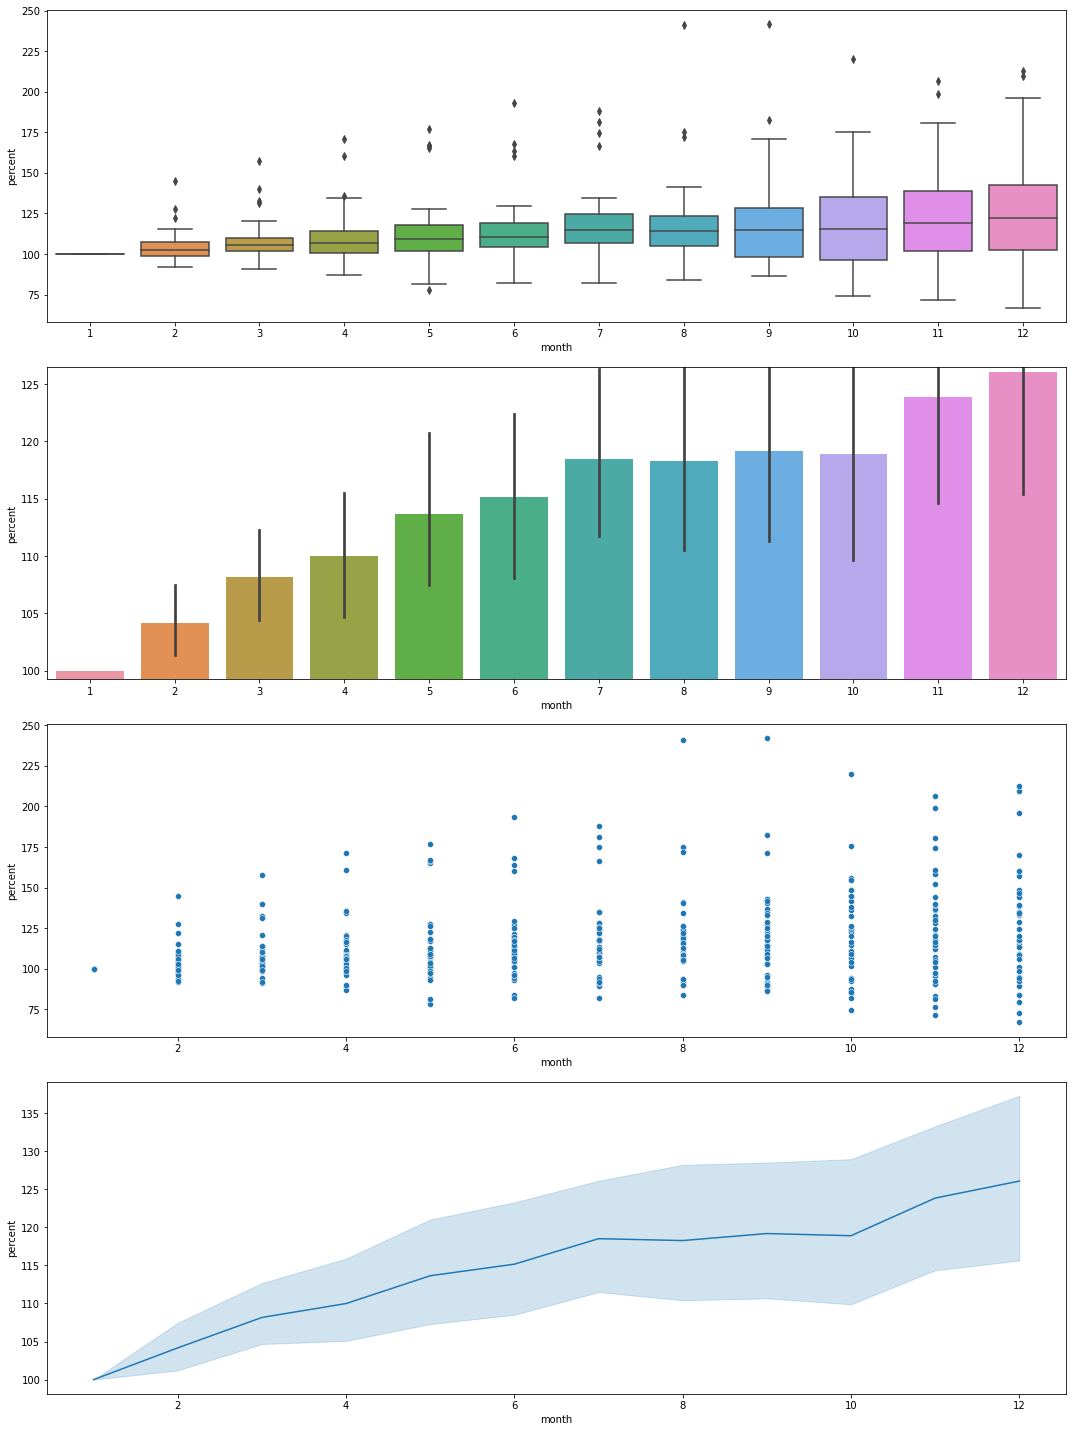

In [6]:
plot(x=Column.MONTH, y=Column.PERCENT, data=df)

## Daily stock price fluctuations within a week

In [7]:
from analysis import get_best_weekday


df = get_best_weekday(FILENAME, limit=LIMIT)

df

[*********************100%***********************]  5 of 5 completed


year  week  weekday     percent
249   2011    52        1       100.0
250   2011    52        2       100.0
251   2011    52        3    99.40153
252   2011    52        4   99.673561
1     2011     1        0       100.0
...    ...   ...      ...         ...
2007  2018    51        4   99.482776
2008  2018    52        0       100.0
2009  2018    52        2   99.870359
2010  2018    52        3  103.653504
2011  2018    52        4  106.175602

[9553 rows x 4 columns]

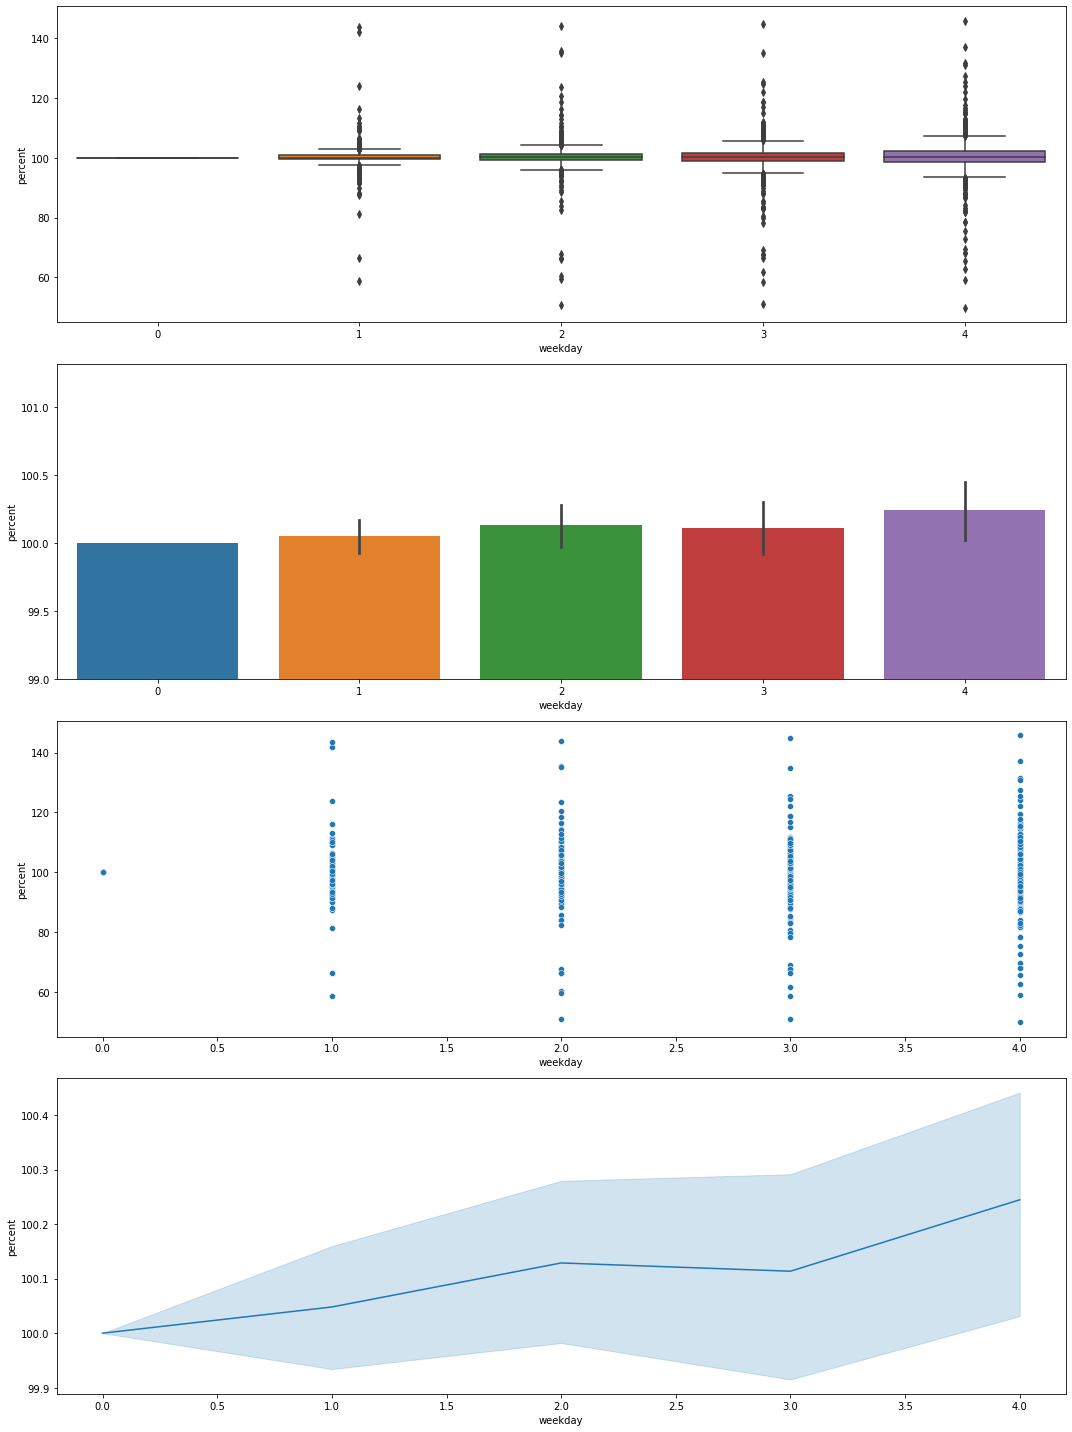

In [8]:
plot(x=Column.WEEKDAY, y=Column.PERCENT, data=df)

## Quarterly stock price fluctuations within an hour

In [14]:
from analysis import get_best_quarter

START_DATE = '2021-04-01'
END_DATE = '2021-05-01'

df = get_best_quarter(FILENAME, limit=LIMIT, start_date=START_DATE, end_date=END_DATE)

df

[*********************100%***********************]  5 of 5 completed


year  week  day  hour  minute  quarter     percent
0    2021    13    1     9      30       30       100.0
1    2021    13    1     9      45       45   98.705476
2    2021    13    1    10       0        0       100.0
3    2021    13    1    10      15       15  100.282866
4    2021    13    1    10      30       30  100.227223
..    ...   ...  ...   ...     ...      ...         ...
541  2021    17   30    14      45       45   100.06693
542  2021    17   30    15       0        0       100.0
543  2021    17   30    15      15       15   100.03764
544  2021    17   30    15      30       30  100.225844
545  2021    17   30    15      45       45  100.317856

[2730 rows x 7 columns]

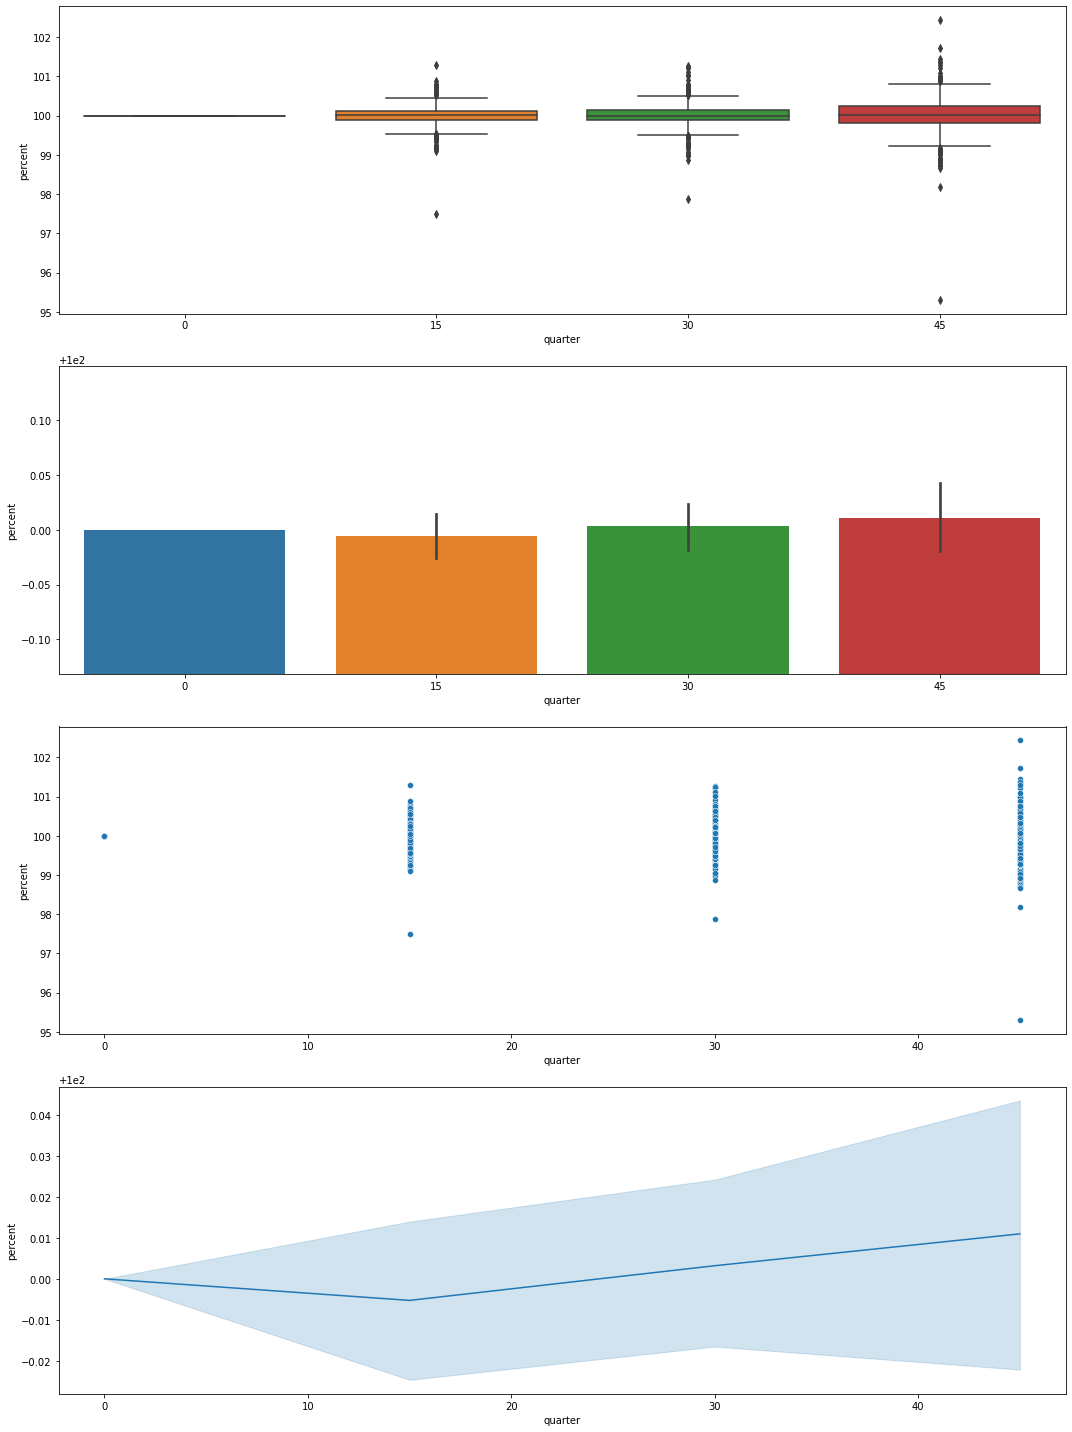

In [15]:
plot(x=Column.QUARTER, y=Column.PERCENT, data=df)

## Hourly and quarterly stock price fluctuations within an hour

In [16]:
from analysis import get_best_time

df = get_best_time(FILENAME, limit=LIMIT, start_date=START_DATE, end_date=END_DATE)

df

[*********************100%***********************]  5 of 5 completed


year  week  day  hour  minute   time     percent
0    2021    13    1     9      30    9.5       100.0
1    2021    13    1     9      45   9.75    99.25893
2    2021    13    1    10       0   10.0       100.0
3    2021    13    1    10      15  10.25  100.732981
4    2021    13    1    10      30   10.5  101.211676
..    ...   ...  ...   ...     ...    ...         ...
541  2021    17   30    14      45  14.75  100.236006
542  2021    17   30    15       0   15.0       100.0
543  2021    17   30    15      15  15.25   99.813611
544  2021    17   30    15      30   15.5   99.916129
545  2021    17   30    15      45  15.75   99.751478

[2730 rows x 7 columns]

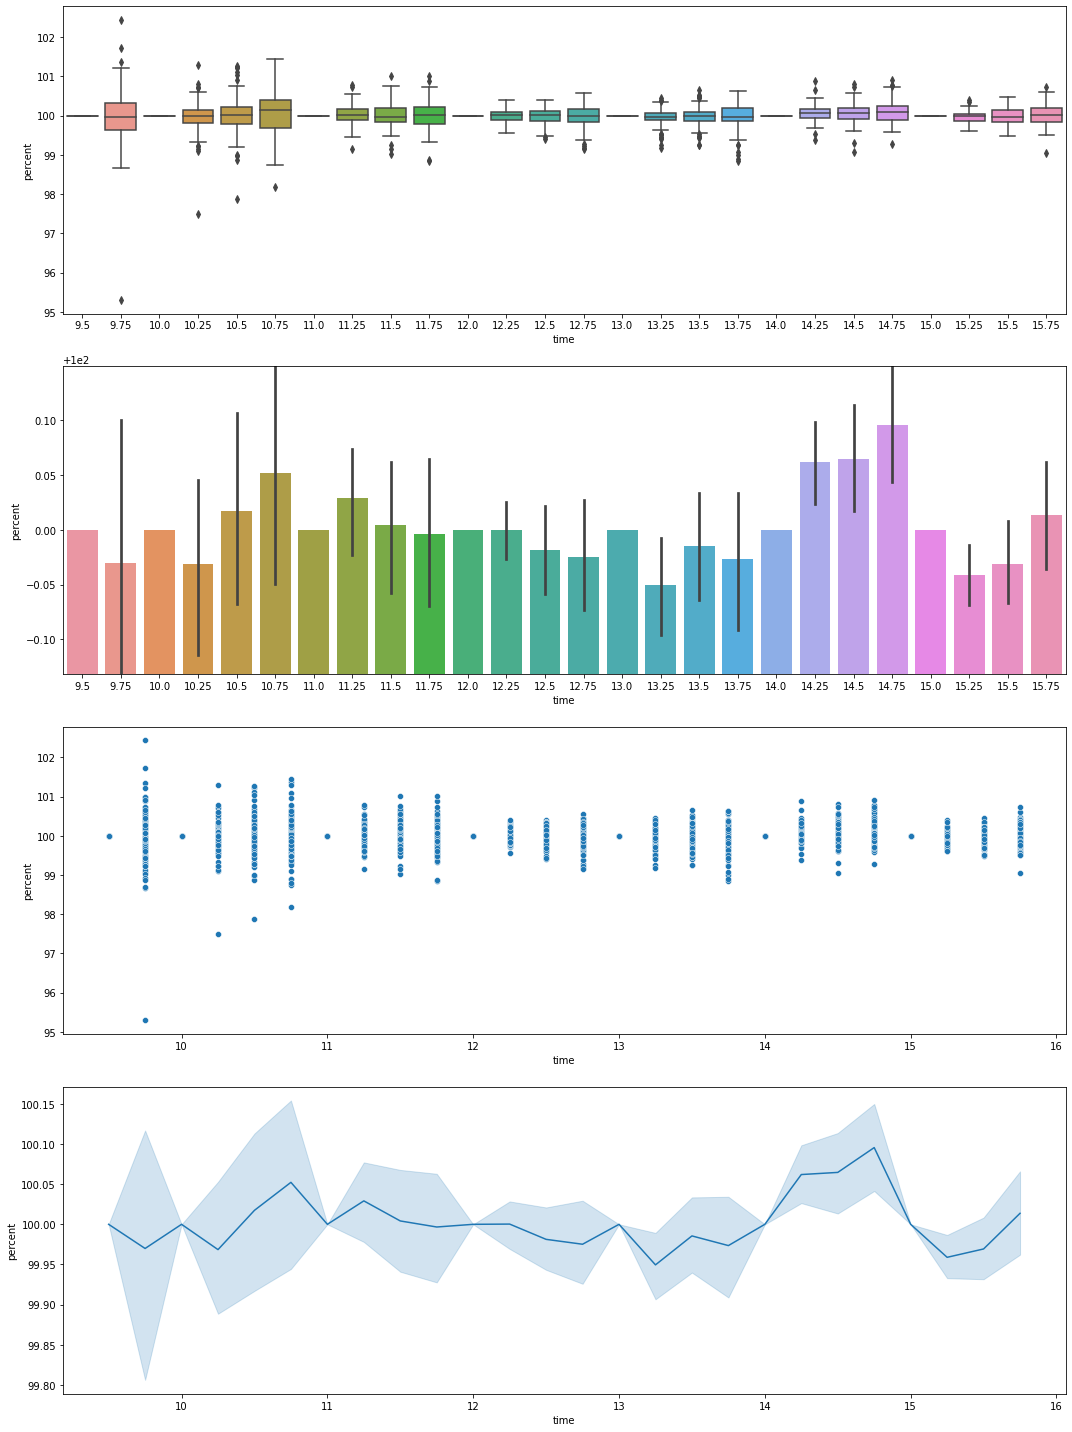

In [17]:
plot(x=Column.TIME, y=Column.PERCENT, data=df)